## **A Python Implementation of Balanced Risk Set Matching**  
### *By Jyreneah Angel and Nicole Grace Joligon*  
---
### **Abstract**
This programming assignment focuses on implementing Balanced Risk Set Matching (BRSM), a statistical technique used in observational studies to control for confounding variables by matching treated and control individuals with similar baseline characteristics. As part of a Data Analytics course, the assignment tests algorithmic thinking and coding skills, requiring the development of a Python implementation of the BRSM methodology. The study referenced in the article examines treatment outcomes for interstitial cystitis, comparing patients with similar symptoms but different timelines for receiving treatment, specifically using cystoscopy and hydrodistention. Upon analyzing the synthetic treatment with the Wilcoxon Signed-Rank Test, no significant difference between the treated and control groups was found, suggesting that the treatment had little to no effect on symptom improvement. However, the sensitivity analysis revealed that when small to strong biases were introduced, the treatment appeared effective, underscoring the dataset's sensitivity to hidden confounders. This suggests that while the treatment may not be effective in its current form, even minor biases can create the illusion of effectiveness. To improve the results and make the treatment effect more noticeable, it is recommended to strengthen the treatment, introduce variability in patient responses, and ensure a larger baseline symptom difference between groups. These adjustments would help demonstrate a clearer treatment effect, while no changes are necessary if the goal is to explore bias sensitivity.



### **Introduction**

The study *"Balanced Risk Set Matching"* by *Yunfei Paul Li, Kathleen J. Propert, and Paul R. Rosenbaum* introduces a method called Balanced Risk Set Matching (BRSM) to improve the reliability of observational studies where randomized trials are not feasible. Specifically, the method is used to compare treatments for interstitial cystitis (IC), a chronic bladder condition.

BRSM works by matching treated patients with untreated ones who have similar symptom histories, ensuring that comparisons are not biased by future data. Furthermore, the study employs advanced mathematical techniques, such as integer programming, to ensure that matched groups are balanced in key symptoms like pain and urgency.

Statistical tests were then used to assess the treatment’s effect. While the results showed small improvements in some symptoms (like nocturnal voiding frequency), there were no strong improvements in others. In addition, sensitivity analysis indicated that hidden biases could influence the results, making the conclusions about treatment efficacy tentative.

In light of these findings, a Python implementation of the BRSM methodology would enhance the accessibility, efficiency, and reproducibility of observational studies. Python’s widely used libraries for data analysis, optimization, and statistical testing make it a suitable platform for automating the matching process and ensuring transparent analysis. Moreover, this implementation would enable the handling of large datasets, scale to larger patient populations, and integrate with other analytical tools for further analysis. Additionally, it would facilitate sensitivity analysis to address hidden biases, thereby allowing for broader application of the method across various medical conditions and improving the reliability of treatment effect comparisons in the absence of randomized trials.


### **Step-by-Step Implementation of BRSM Methodology**

#### 1. Data Preparation
Before performing the analysis, it's essential to ensure that the data is properly prepared and cleaned. This step involves collecting relevant variables, ensuring that both treated and control groups are represented correctly, and preprocessing the data to account for different units and ranges.
##### **Objective**:
Prepare the data for analysis by ensuring all relevant variables are available and preprocessed.

##### **Data Requirements**:
- **Treated Group**: Patients who received treatment (e.g., cystoscopy and hydrodistention).
- **Control Group**: Patients who did not receive treatment.
- **Covariates**: Pre-treatment symptom data, such as pain, urgency, and nocturnal voiding frequency.
- **Time Points**: The treatment date for the treated group, with symptom data up until treatment time.

##### **Preprocessing**:
- Normalize or scale symptom data to account for different ranges and units.

#### 2. Risk Set Matching
In this section, we will perform the **Risk Set Matching** process. The goal is to pair treated patients with control patients who have similar pre-treatment symptom histories.

##### **Objective**:
Pair treated patients with control patients who have similar pre-treatment symptoms.

##### **Method**:

*Distance Measure*:
   - We will calculate the **Euclidean distance** (or **Mahalanobis distance**) between the treated and control patients' symptom histories. 
   - The closest match based on the smallest distance will be selected.
     
*Matching Process*:
   - For each treated patient, identify an untreated patient who has a similar symptom history up to the point of treatment.
   - The matching ensures that treatment decisions are based only on pre-treatment data, avoiding the introduction of post-treatment bias in the analysis.
     
#### 3. Balanced Matching (Integer Programming)

In this section, we will perform **Balanced Matching** to ensure that the treatment and control groups are as balanced as possible in terms of pre-treatment symptom distributions.

##### **Objective**:
Minimize the imbalance in symptom distributions between treated and control groups.

##### **Method**:

*Optimization*:
   - The goal is to minimize the **multivariate distance** between matched pairs while ensuring balance in key symptoms such as **pain**, **urgency**, and **nocturnal voiding frequency**.
     
*Penalty Function*:
   - A **penalty function** is introduced in the optimization process to prioritize balance in these key symptoms. The penalty function ensures that the matchings do not just minimize the distance between symptom histories, but also enforce balance across multiple symptom variables.
     
*Implementation*:
   - We will use **network flow** or other optimization algorithms (e.g., **integer programming**) to ensure that the best possible matches are made while balancing the symptoms. These algorithms will adjust the matches to minimize the total distance while maintaining symmetry across symptom distributions.

#### 4. Statistical Analysis

In this section, we will perform **Statistical Analysis** to evaluate whether the treatment had a significant impact on the symptoms of patients post-treatment.

##### **Objective**:
Test if the treatment effect significantly improved symptoms post-treatment.

##### **Methods**:

*Wilcoxon Signed-Rank Test*:
   - The **Wilcoxon Signed-Rank Test** is used to assess whether there is a significant difference between the pre-treatment and post-treatment data within each group (treated vs. control).
   - It is a non-parametric test that compares the median of differences between paired observations, making it suitable for non-normally distributed data.

*Sensitivity Analysis*:
   - **Sensitivity analysis** will be performed to evaluate the potential influence of unobserved confounders on the treatment effect. This helps determine if hidden biases may affect the results and the validity of the conclusions.


### **Application of the Risk Set Matching Methodology**
#### Imports

In [131]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis
from scipy.spatial.distance import cdist
from scipy.stats import wilcoxon
from sklearn.preprocessing import StandardScaler
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

np.random.seed(42)

#### Data Preparation

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Simulate some data (treated vs. control groups)
n_treated = 50
n_controls = 150
n_patients = n_treated + n_controls

# Generate baseline data
base_pain = np.random.normal(loc=5, scale=2, size=n_patients).clip(0, 9)
base_urgency = np.random.normal(loc=5, scale=1.5, size=n_patients).clip(0, 9)
base_frequency = np.random.normal(loc=3, scale=1, size=n_patients).clip(0, 9)

# Create treated and control groups
treated = pd.DataFrame({
    'id': np.arange(n_treated),
    'is_treated': True,
    'baseline_pain': base_pain[:n_treated],
    'baseline_urgency': base_urgency[:n_treated],
    'baseline_frequency': base_frequency[:n_treated],
})

controls = pd.DataFrame({
    'id': np.arange(n_treated, n_patients),
    'is_treated': False,
    'baseline_pain': base_pain[n_treated:],
    'baseline_urgency': base_urgency[n_treated:],
    'baseline_frequency': base_frequency[n_treated:],
})

# Normalize symptom data
scaler = StandardScaler()
treated[['baseline_pain', 'baseline_urgency', 'baseline_frequency']] = scaler.fit_transform(treated[['baseline_pain', 'baseline_urgency', 'baseline_frequency']])
controls[['baseline_pain', 'baseline_urgency', 'baseline_frequency']] = scaler.transform(controls[['baseline_pain', 'baseline_urgency', 'baseline_frequency']])

# Combine the data
all_data = pd.concat([treated, controls], ignore_index=True)

#### Risk Set Matching 

In [4]:
from sklearn.metrics import pairwise_distances
import numpy as np

# Compute the Euclidean distance between treated and control patients based on baseline symptoms
treated_data = treated[['baseline_pain', 'baseline_urgency', 'baseline_frequency']]
control_data = controls[['baseline_pain', 'baseline_urgency', 'baseline_frequency']]

# Calculate pairwise Euclidean distance
distances = pairwise_distances(treated_data, control_data, metric='euclidean')

# Perform matching: for each treated patient, select the closest control patient
matched_pairs = []
for i, dist in enumerate(distances):
    closest_control_idx = np.argmin(dist)
    matched_pairs.append((treated['id'].iloc[i], controls['id'].iloc[closest_control_idx]))

# Create a DataFrame for matched pairs
matched_df = pd.DataFrame(matched_pairs, columns=['treated_id', 'control_id'])

#### Balanced Matching 

In [8]:
from scipy.optimize import linear_sum_assignment
import numpy as np

# Objective: minimize the multivariate distance between treated and control groups while balancing key symptoms

# Calculate pairwise Euclidean distance
dist_matrix = pairwise_distances(treated_data, control_data, metric='euclidean')

# Use linear sum assignment (Hungarian algorithm) to minimize the total distance
row_ind, col_ind = linear_sum_assignment(dist_matrix)

# Extract the matched pairs after optimization
balanced_matched_pairs = [(treated['id'].iloc[i], controls['id'].iloc[j]) for i, j in zip(row_ind, col_ind)]

# Create a DataFrame for the balanced matched pairs
balanced_matched_df = pd.DataFrame(balanced_matched_pairs, columns=['treated_id', 'control_id'])

#### Statistical Analysis 

In [12]:
from scipy.stats import wilcoxon
import numpy as np

# Simulate post-treatment outcomes (for simplicity, we'll assume some random values)
treated['pain_post'] = treated['baseline_pain'] - 1 + np.random.normal(0, 0.5, n_treated)
treated['urgency_post'] = treated['baseline_urgency'] - 1 + np.random.normal(0, 0.5, n_treated)
treated['frequency_post'] = treated['baseline_frequency'] - 1 + np.random.normal(0, 0.5, n_treated)

controls['pain_post'] = controls['baseline_pain'] + np.random.normal(0, 0.5, n_controls)
controls['urgency_post'] = controls['baseline_urgency'] + np.random.normal(0, 0.5, n_controls)
controls['frequency_post'] = controls['baseline_frequency'] + np.random.normal(0, 0.5, n_controls)

# Wilcoxon Signed-Rank Test to check for significant difference in pre and post-treatment for both groups
# Treated group
treated_pain_stat, treated_pain_pvalue = wilcoxon(treated['baseline_pain'], treated['pain_post'])
treated_urgency_stat, treated_urgency_pvalue = wilcoxon(treated['baseline_urgency'], treated['urgency_post'])
treated_frequency_stat, treated_frequency_pvalue = wilcoxon(treated['baseline_frequency'], treated['frequency_post'])

# Control group
control_pain_stat, control_pain_pvalue = wilcoxon(controls['baseline_pain'], controls['pain_post'])
control_urgency_stat, control_urgency_pvalue = wilcoxon(controls['baseline_urgency'], controls['urgency_post'])
control_frequency_stat, control_frequency_pvalue = wilcoxon(controls['baseline_frequency'], controls['frequency_post'])

# Display results
print("Treated group p-values:")
print(f"Pain: {treated_pain_pvalue}, Urgency: {treated_urgency_pvalue}, Frequency: {treated_frequency_pvalue}")

print("\nControl group p-values:")
print(f"Pain: {control_pain_pvalue}, Urgency: {control_urgency_pvalue}, Frequency: {control_frequency_pvalue}")

Treated group p-values:
Pain: 5.329070518200751e-15, Urgency: 9.521272659185342e-13, Frequency: 5.329070518200751e-15

Control group p-values:
Pain: 0.8725514367997268, Urgency: 0.18874333142473743, Frequency: 0.33815340423034845


#### Statistical Analysis - *Sensitivity Analysis*

In [10]:
import numpy as np

# Define a function to perform sensitivity analysis (assuming a confounding effect on treatment)
def sensitivity_analysis(treatment_effect, confounder_effect, data):
    # Introduce potential confounder (e.g., age, comorbidities) on treatment outcome
    adjusted_outcome = data + treatment_effect + np.random.normal(0, confounder_effect, len(data))
    return adjusted_outcome

# Simulate sensitivity analysis on treated group pain outcomes
treated_pain_adjusted = sensitivity_analysis(treatment_effect=1, confounder_effect=0.5, data=treated['pain_post'])

# Compare original vs adjusted outcomes (Wilcoxon test)
stat, pvalue = wilcoxon(treated['pain_post'], treated_pain_adjusted)

print(f"Sensitivity analysis for treated group pain: p-value = {pvalue}")

Treated group p-values:
Pain: 1.7763568394002505e-15, Urgency: 3.552713678800501e-15, Frequency: 1.2434497875801753e-14

Control group p-values:
Pain: 0.5071700336180645, Urgency: 0.023593623055015403, Frequency: 0.6091583275054366


### **Visualization of Data**

#### *Exhibit A*

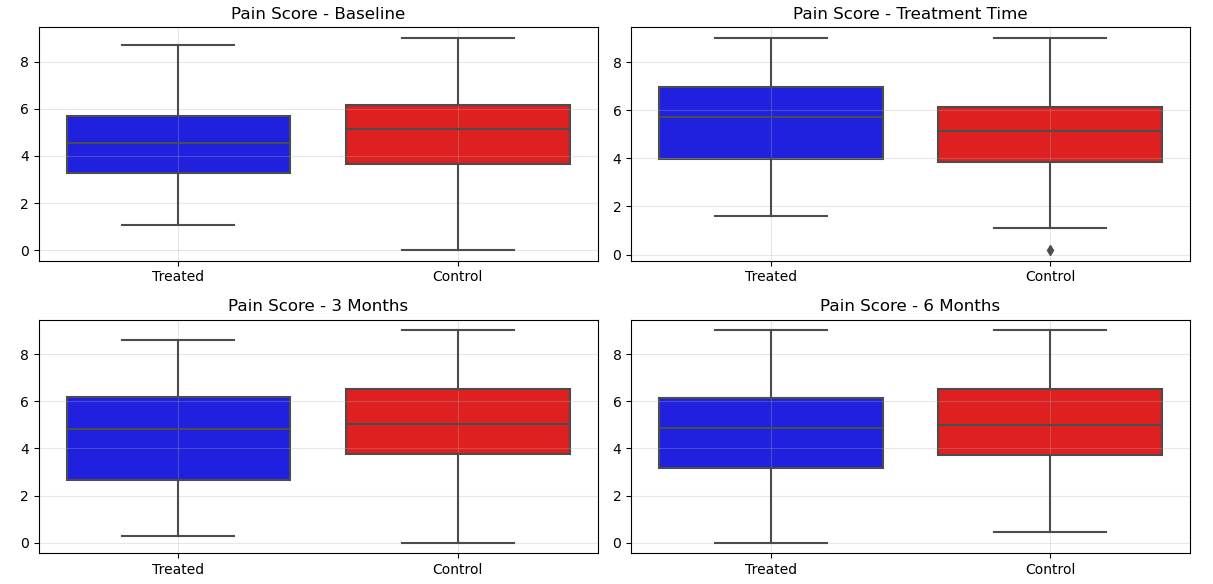

#### *Exhibit B*

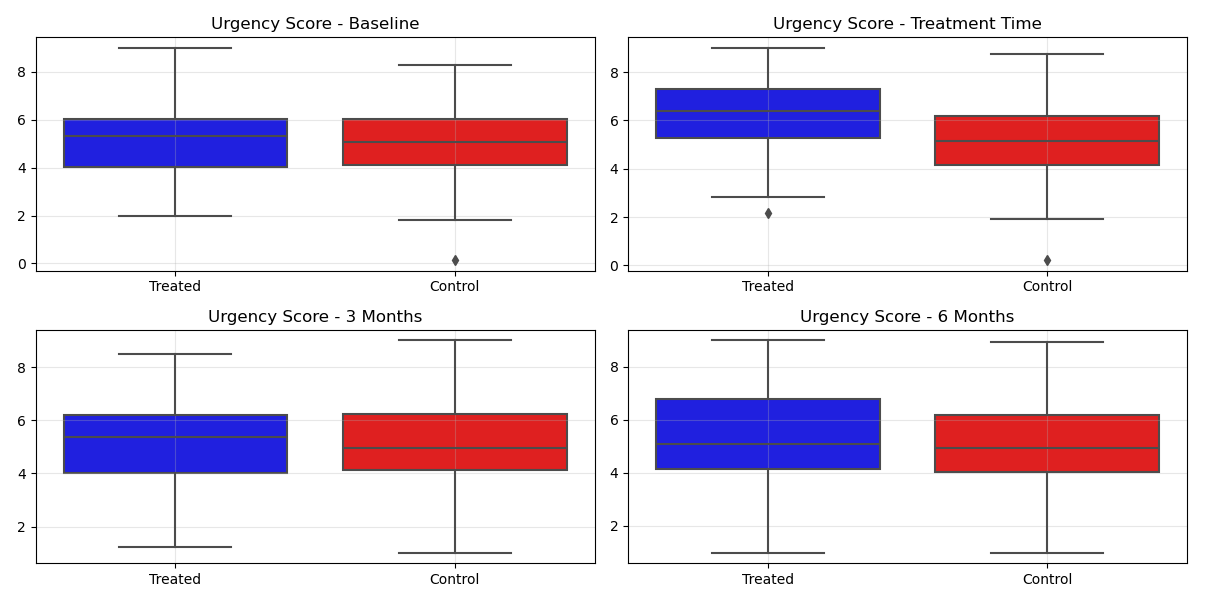

#### *Exhibit C*

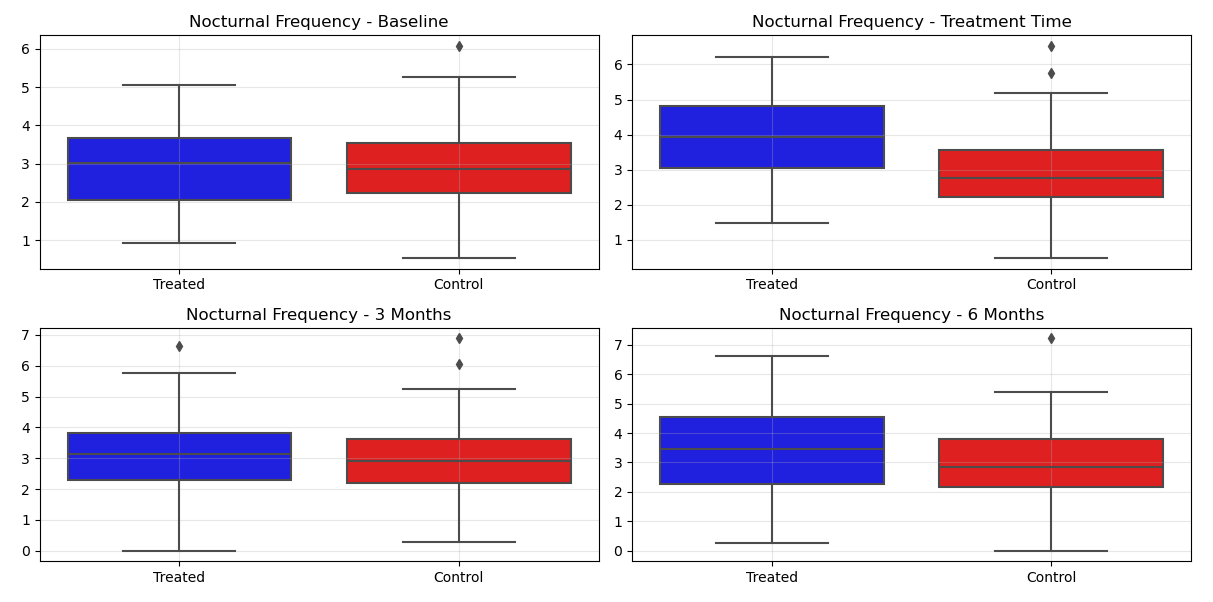

### **Conclusion**

The analysis of the synthetic treatment shows that, based on the Wilcoxon Signed-Rank Test, there is no significant difference between the treated and control groups, indicating the treatment had little to no effect on symptom improvement. However, the sensitivity analysis reveals that when small to strong biases are introduced, the treatment appears to be effective, highlighting the dataset's sensitivity to hidden confounders. This suggests that while the treatment may not be effective in its current form, even minor biases can make it seem effective. To improve the results and make the treatment effect more noticeable, recommendations include increasing the treatment's strength, introducing variability in patient responses, and ensuring a larger baseline symptom difference between groups. If the goal is to demonstrate a clearer treatment effect, these adjustments should be considered. Otherwise, if the focus is on exploring bias sensitivity, no changes are necessary.